In [2]:
#pip install matplotlib
#pip3 install seaborn
#pip3 install pywaffle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pywaffle import Waffle

In [4]:
root_path = '/Users/lpwilson/Ada/Developer/projects/Capstone/EEO1s/'
#read in the long format csv
EEO1_data = pd.read_csv(root_path + 'long_csv.csv')

In [5]:
EEO1_data = pd.DataFrame(EEO1_data)
EEO1_data = EEO1_data.drop(columns = ['Unnamed: 0'])
#EEO1_data.info()
#EEO1_data.head(20)

# goal: 
make a line plot filtered by company and job category that tracks gender (or race) 
as a percentage of total employees in that category over years. 

so, the x-axis points will be the year values
and the y-axis points will be the percentage of employees of each gender.

let's try to get the x- and y- values that we need. 

In [6]:
#set up the filters
company = "Amazon"
#I want to only look at some job categories for now, for readability.
job_cats = ['Exec/Sr. Officials & Mgrs']
job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']

#choosing these names to match our queries.
sortBy1 = 'job_category'
sortBy2 = 'gender'

Now let's try to get the y-values for one of the job categories.
we want the sum of count_employees for a given job category and gender.

Let's also filter (query) by the job cats we want.

In [7]:
#can I do the query above and below in one line?
dbl_qry_amz = EEO1_data.query(f"company == '{company}'").query('job_category.isin(@job_cats)').groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'})
dbl_qry_amz = pd.DataFrame(dbl_qry_amz)

([<matplotlib.axis.XTick at 0x117f7cf40>,
 [Text(2019.0, 0, '2019'), Text(2020.0, 0, '2020'), Text(2021.0, 0, '2021')])

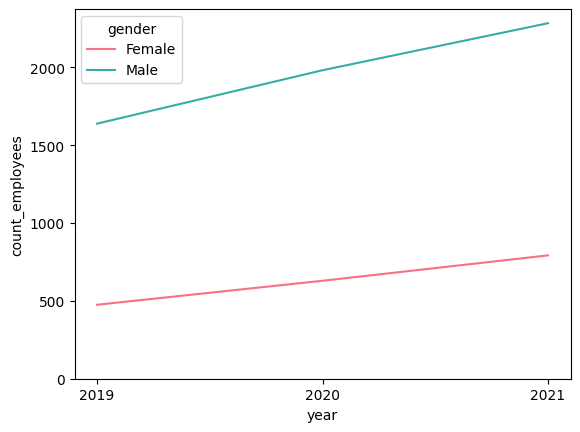

In [8]:
raw_num_plot = sns.lineplot(data = dbl_qry_amz, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
loc, labels = plt.xticks()
plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1)) #this is my brute force way of getting the ticks to be on whole number years 
#raw_num_plot.set(xticks=[2019, 2020, 2021])

This is a good starting point.

Next:
Graph the percent of females in each field over years?
That would allow us to have more job categories, all on the same graph.

I'm focusing on Amazon because I think that their demographics are the most distorted by different job categories.

In [9]:
perc_qry = dbl_qry_amz.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))

perc_qry

count_employees
year job_category              gender                 
2019 Exec/Sr. Officials & Mgrs Female        22.479886
                               Male          77.520114
2020 Exec/Sr. Officials & Mgrs Female        24.099617
                               Male          75.900383
2021 Exec/Sr. Officials & Mgrs Female        25.756098
                               Male          74.243902

[[<matplotlib.axis.XTick at 0x1180e36a0>,

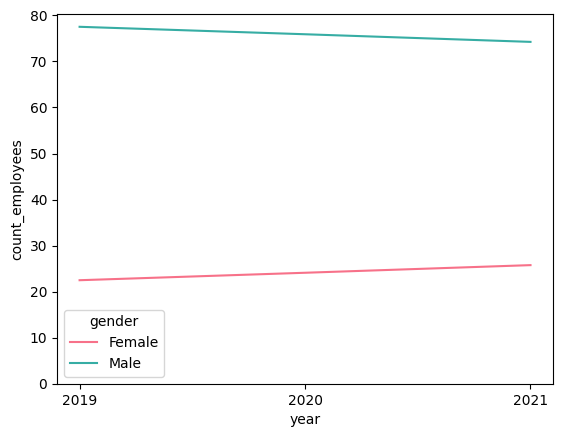

In [10]:
perc_num_plot = sns.lineplot(data = perc_qry, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
perc_num_plot.set(xticks=[2019, 2020, 2021])

Okay, good so far.
Now, I want to see the graphs of each of the job categories I'm interested in side-by-side. 

There's a way to do this using subplots, I believe.  
For now, though, let's make a helper function to do the above for me.
Inputs: filters and group by's, output: graph of the percentages.

Then, I can use this helper function to make the plots I need for my subplots. (I think.)

In [70]:
def graph_totals(company, job, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = False):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"job_category =='{job}'").groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
        data_to_graph = percs
        plt.ylim(0, 100)
        plt.ylabel(f"Percent of {job} (%)")
        plt.title(f"Percent of {company} {job} by {sortBy2.capitalize()}")
    else:
        data_to_graph = filtered_df
        plt.ylabel(f"Count of {job}")
        plt.title(f"Count of {company} {job} by {sortBy2.capitalize()}")
        
    raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2, palette="husl")
    
    ax = plt.subplot(111)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


    loc, labels = plt.xticks()
    plt.xlabel("Year")
    plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1))

    return raw_num_plot


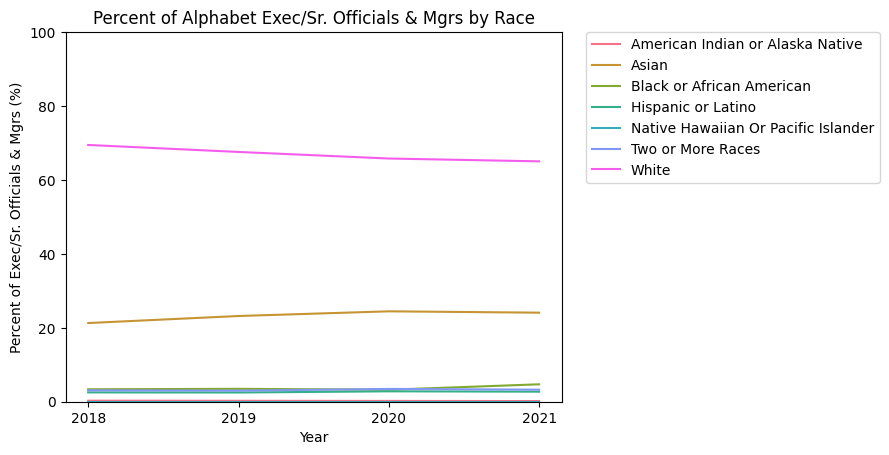

In [83]:
alph_exec_race = graph_totals('Alphabet', 'Exec/Sr. Officials & Mgrs', EEO1_data, sortBy2 = 'race', percent = True)
fig = alph_exec_race.get_figure()
fig.savefig("alph_exec_race", bbox_inches='tight')


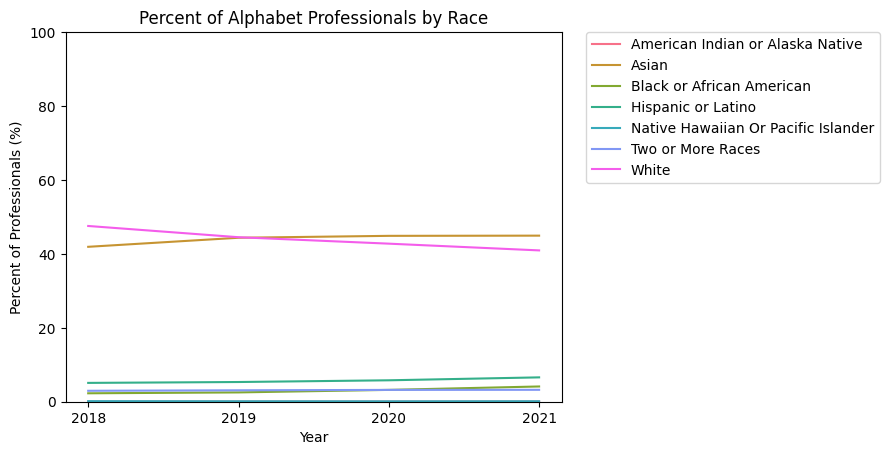

In [84]:
alph_prof_race = graph_totals('Alphabet', 'Professionals', EEO1_data, sortBy2 = 'race', percent = True)
fig = alph_prof_race.get_figure()
fig.savefig("alph_prof_race", bbox_inches='tight')

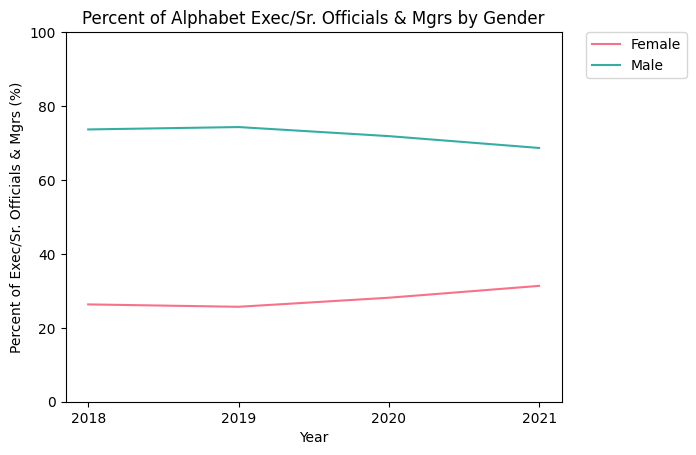

In [85]:
alph_exec_gender= graph_totals('Alphabet', 'Exec/Sr. Officials & Mgrs', EEO1_data, sortBy2 = 'gender', percent = True)
fig = alph_exec_gender.get_figure()
fig.savefig("alph_exec_gender", bbox_inches='tight')

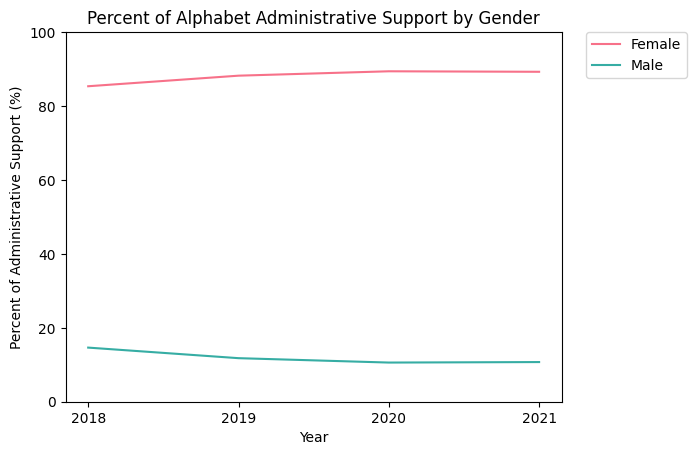

In [87]:
alph_admin_gender = graph_totals('Alphabet', 'Administrative Support', EEO1_data, sortBy2 = 'gender', percent = True)
fig = alph_admin_gender.get_figure()
fig.savefig("alph_admin_gender", bbox_inches='tight')

<AxesSubplot: title={'center': 'Count of Alphabet Administrative Support by Gender'}, xlabel='Year', ylabel='Count of Administrative Support'>

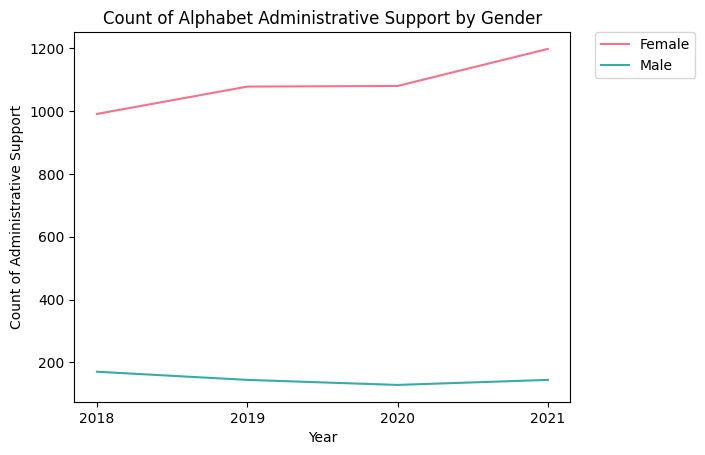

In [89]:
graph_totals('Alphabet', 'Administrative Support', EEO1_data, sortBy2 = 'gender', percent = False)

Goals accomplished:
- make sure y-axis goes to 100 when it's percents.
- make sure y-axis label says percents when it's percents. 
- make a graph title that has the query you used to get it, including company and job category.

I made the function work either with percents or without percents.

next: 

- make title not have list markings around the job category selected.
- let's work on displaying the graphs in subplot form.
- Make this work with multiple job categories selected. (each category would make a new subplot.)
- It would be great if the backend could return these graphs - perhaps they could click on the company, and select the job categories, and it would return it?  stretch goal. 

Let's make a function that graphs the job categories in subplots next to each other.


In [77]:
#THIS REALLY ISN'T WORKING :(  SO SAD.

def graph_totals_mult_jobs(company, job_cats, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = True):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    sns.set()
    fig, axes = plt.subplots(1, len(job_cats))

    for ix, job in enumerate(job_cats):
        filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"job_category =='{job}'").groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
        if percent == True:
            percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
            data_to_graph = percs
            plt.ylim(0, 100)
            plt.ylabel(f"Percent of {job} (%)")
            plt.title(f"Percent of {company} {job} by {sortBy2}")
        else:
            data_to_graph = filtered_df
            plt.ylabel(f"Count of {job}")
            plt.title(f"Count of {company} {job} by {sortBy2}")
        loc, labels = plt.xticks()
        xtics = np.arange(math.ceil(min(loc)), max(loc), step = 1)
        ax = plt.subplot(111)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
        raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2, palette="husl", ax=axes[ix])
    plt.xlabel("Year")
    plt.xticks(xtics)
    plt.show()
        

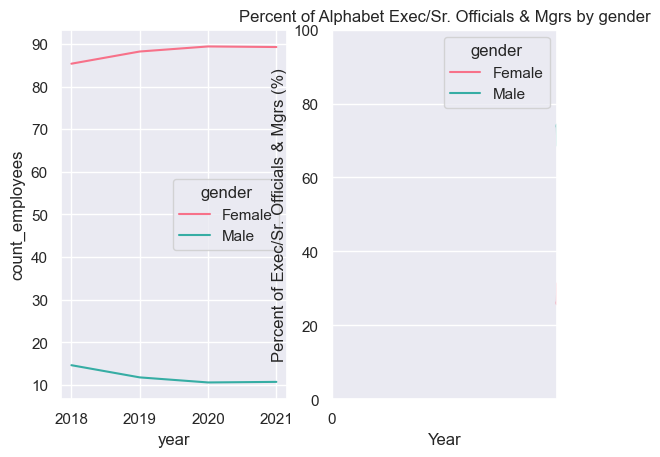

In [25]:
graph_totals_mult_jobs('Alphabet', ['Administrative Support', 'Exec/Sr. Officials & Mgrs'], EEO1_data, sortBy2 = 'gender', percent = True)
#this isn't really working yet, because the labels are all overlapping.  let's just stick with what we have above (for individual graphs), and move on for now. 

Next goal: 
Make a graph that shows what percent of each race is in what job category over time.
so: filter by a single race
and show lines for the percentage of that race that is in each job category. (do for race and gender?)  think about this.

In [78]:
def graph_totals_by_race(company, race, data = EEO1_data, sortBy1 = 'race', sortBy2 = 'job_category', percent = False): #sortby 1 and sort by 2 aren't really customizable tbh. 
    """This takes in a company, race to show, and fields to filter by (defaulting to race and job_category.)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"race =='{race}'").groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
        data_to_graph = percs
        plt.ylim(0, 100)
        plt.ylabel(f"Percent of {race} (%)")
        plt.title(f"Percent of {company} {race} Employees by {sortBy2}")
    else:
        data_to_graph = filtered_df
        plt.ylabel(f"Count of {race}")
        plt.title(f"Count of {company} {race} Employees by {sortBy2}")
        
    ax = plt.subplot(111)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2)
    
    loc, labels = plt.xticks()
    ax = plt.subplot(111)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.xlabel("Year")
    plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1))
    return raw_num_plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


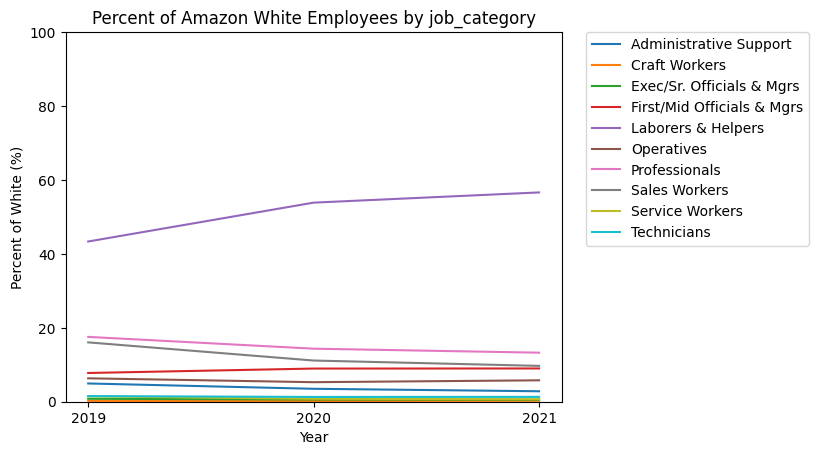

In [92]:
# "Hispanic or Latino"	"White"	"Black or African American"	"Native Hawaiian Or Pacific Islander"	"Asian"	"American Indian or Alaska Native"	"Two or More Races"
amz_white_jobs = graph_totals_by_race("Amazon", "White", EEO1_data, percent = True)
fig = amz_white_jobs.get_figure()
fig.savefig("amz_white_jobs", bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


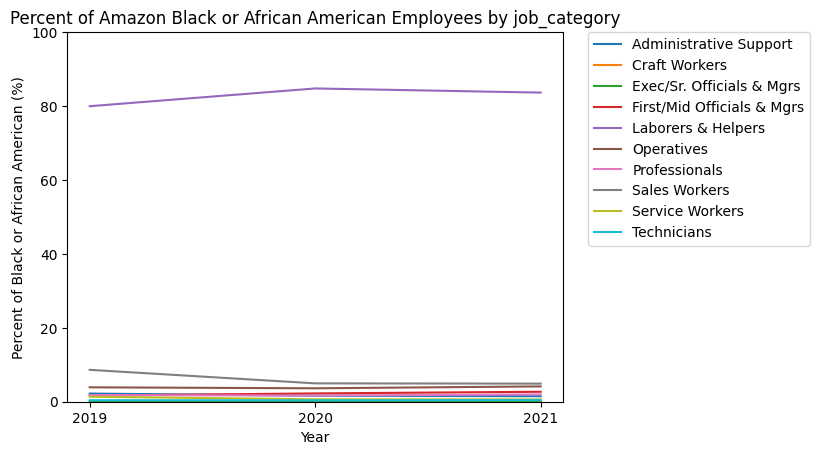

In [91]:
amz_Black_jobs = graph_totals_by_race("Amazon", "Black or African American", EEO1_data, percent = True)
fig = amz_Black_jobs.get_figure()
fig.savefig("amz_Black_jobs", bbox_inches='tight')

##this would show well in a pie chart.
#or add a dotted line for company wide averages for each job category.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Percent of Alphabet White Employees by job_category'}, xlabel='Year', ylabel='Percent of White (%)'>

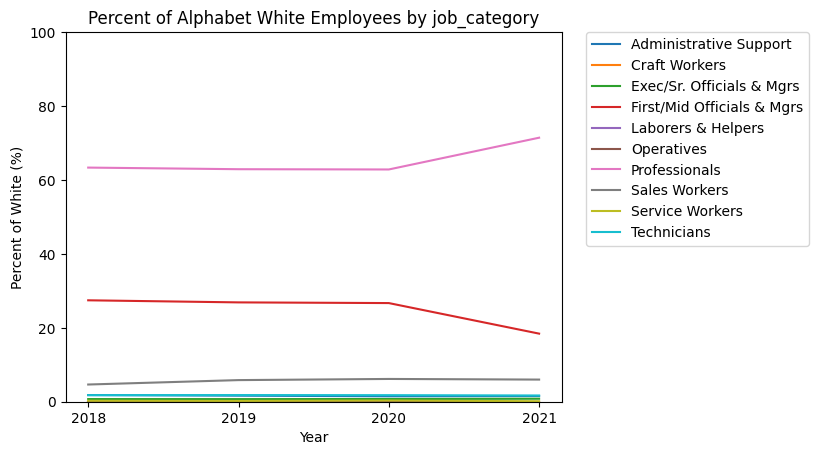

In [81]:
graph_totals_by_race("Alphabet", "White", EEO1_data, percent = True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: title={'center': 'Percent of Alphabet Black or African American Employees by job_category'}, xlabel='Year', ylabel='Percent of Black or African American (%)'>

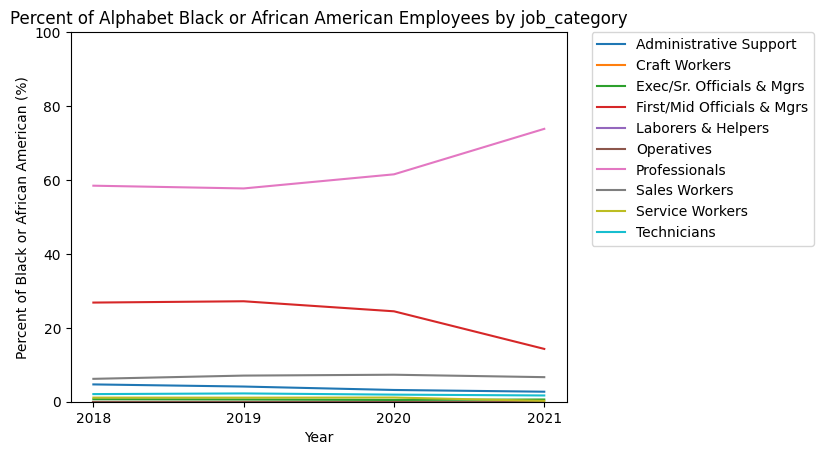

In [82]:
graph_totals_by_race("Alphabet", "Black or African American", EEO1_data, percent = True)

There still is an issue that we don't know how these race numbers compare with the company's numbers as a whole. 
For the graph above, perhaps Google decreased its number of first level managers, while increasing professionals. 

make a super function that can query for race or gender or job category.  use the framework of the functions above.  basically, get it working for gender as well (all these functions are very not DRY.  refactor to make them better.)
(eg: what percent of female employees at amazon work in each job category?)

Another idea: make a loop that goes through each race and prints it's distribution graph.

Next: 
Let's see if we can make a graph that shows people outlines.  for what percent of people are in each job category.

In [22]:
def data_totals(company, job, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = False):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"job_category =='{job}'").groupby([sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:(100 * x /float(x.sum())).round())
        data = percs
    else:
        data = filtered_df

    return data

In [23]:
amz_prof_gender = data_totals("Amazon", "Professionals", data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = True)
amz_prof_gender

count_employees
job_category  gender                 
Professionals Female             31.0
              Male               69.0

In [24]:

job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']
amz_gender_data = {}
for job in job_categories:
    file_name = 'amz_' + str(job)[0:4] + '_gender'
    amz_gender_data[file_name] = data_totals("Amazon", job, percent=True)

In [25]:
amz_tech_gender = amz_gender_data['amz_Tech_gender']

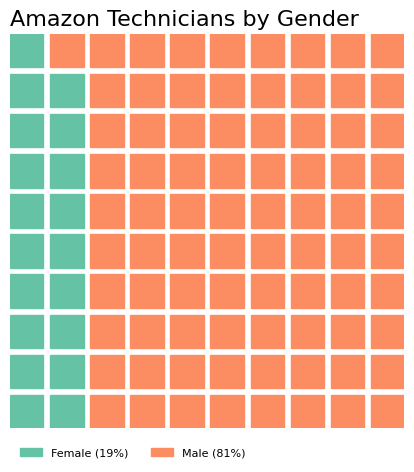

In [26]:
#let's play around with pywaffle and see what we can make. 
tec_gender_fig = plt.figure(
    FigureClass=Waffle,
    rows = 10,
    columns = 10,
    values = amz_tech_gender['count_employees'],
    # labels=list(amz_tech_gender.index),
    # legend={'loc': 'upper left', 'bbox_to_anchor':(1,1)},
    title={'label': "Amazon Technicians by Gender",
    'loc': 'left',
    'fontdict': {
        'fontsize': 16
    }
    },
    labels = [f"{k[1]} ({int(v)}%)" for k, v in amz_tech_gender['count_employees'].items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -.10),
        'ncol': len(amz_tech_gender['count_employees']),
        'framealpha': 0,
        'fontsize': 8
    }
)
tec_gender_fig.savefig("tec_gender_fig.png", bbox_inches="tight")

I really like this. I'm going to make a helper function that outputs the waffle chart when given the dataframe with percents.

In [27]:
#to do: make this customizable by company and race (not just gender)
amz_gender_data = {}
for job in job_categories:
    job_dict = {}
    job_str = ''.join([x for x in str(job)[0:5] if x.isalpha()])
    file_name = 'amz_' + job_str + '_gender'
    job_dict['file_name'] = file_name
    job_dict['job'] = job
    job_dict['data'] = data_totals("Amazon", job, sortBy1 = 'job_category', sortBy2 = 'gender', percent=True)
    amz_gender_data[file_name] = job_dict

In [28]:
#I know there's probably a better way to do this, but for now, let's just get it going for race.
amz_race_data = {}
for job in job_categories:
    job_dict = {}
    job_str = ''.join([x for x in str(job)[0:5] if x.isalpha()])
    file_name = 'amz_' + job_str + '_race'
    job_dict['file_name'] = file_name
    job_dict['job'] = job
    job_dict['data'] = data_totals("Amazon", job, sortBy1 = 'job_category', sortBy2 = 'race', percent=True)
    amz_race_data[file_name] = job_dict

In [48]:
def make_gender_or_race_dict(company, sortBy2):
    gender_or_race_dict = {}
    #you don't need "str" here, because they will be strings, I'm pretty sure.
    for job in job_categories:
        job_dict = {}
        job_str = ''.join([x for x in str(job)[0:5] if x.isalpha()])
        file_name = str(company) + job_str + '_' + str(sortBy2)
        job_dict['job'] = job
        job_dict['data'] = data_totals(str(company), job, sortBy1 = 'job_category', sortBy2 = sortBy2, percent=True)
        gender_or_race_dict[file_name] = job_dict

    return gender_or_race_dict

In [49]:
#let's make a function that makes the dictionary of the company and either race or gender data.
def get_gender_race_data_for_company(company, job_categories=job_categories):
    company_gender_race_dict = {}
    company_gender_race_dict['gender'] = make_gender_or_race_dict(company, 'gender')
    company_gender_race_dict['race'] = make_gender_or_race_dict(company, 'race')

    return company_gender_race_dict
Alphabet_gender_race_dict = get_gender_race_data_for_company("Alphabet")

In [50]:
Alphabet_gender_race_dict['race']
#this gives a dictionary with the keys 'gender' and 'race', and value: dict of tables for all job categories. 

{'AlphabetExec_race': {'job': 'Exec/Sr. Officials & Mgrs',
  'data':                                                                count_employees
  job_category              race                                                
  Exec/Sr. Officials & Mgrs American Indian or Alaska Native                 0.0
                            Asian                                           23.0
                            Black or African American                        4.0
                            Hispanic or Latino                               3.0
                            Native Hawaiian Or Pacific Islander              0.0
                            Two or More Races                                3.0
                            White                                           67.0},
 'AlphabetFirst_race': {'job': 'First/Mid Officials & Mgrs',
  'data':                                                                 count_employees
  job_category               race                  

In [61]:
#making generalizable waffle fig maker (gender or race)

def make_waffle_fig(perc_data, job, file_name, company , sortBy2 ):
    vert_space = len(perc_data) * (-.3/6)


    fig = plt.figure(
        FigureClass=Waffle,
        rows = 10,
        columns = 10,
        values = perc_data,
        # labels=list(amz_tech_gender.index),
        # legend={'loc': 'upper left', 'bbox_to_anchor':(1,1)},
        title={'label': str(company) + " " + str(job)+ " by " + str(sortBy2),
        'loc': 'left',
        'fontdict': {
            'fontsize': 16
        }
        },
        labels = [f"{k[1]} ({int(v)}%)" for k, v in perc_data.items()],
        legend={
            'loc': 'lower left',
            'bbox_to_anchor': (0, vert_space),
            #'ncol': len(perc_data),
            'ncol': 2,
            'framealpha': 0,
            'fontsize': 8
        }
    )
    fig.savefig(str(file_name) + ".png", bbox_inches="tight")
    return fig

{'job': 'Exec/Sr. Officials & Mgrs', 'data':                                   count_employees
job_category              gender                 
Exec/Sr. Officials & Mgrs Female             28.0
                          Male               72.0}
made waffle fig
{'job': 'First/Mid Officials & Mgrs', 'data':                                    count_employees
job_category               gender                 
First/Mid Officials & Mgrs Female             39.0
                           Male               61.0}
made waffle fig
{'job': 'Professionals', 'data':                       count_employees
job_category  gender                 
Professionals Female             28.0
              Male               72.0}
made waffle fig
{'job': 'Technicians', 'data':                      count_employees
job_category gender                 
Technicians  Female             13.0
             Male               87.0}
made waffle fig
{'job': 'Sales Workers', 'data':                       count_employees
jo

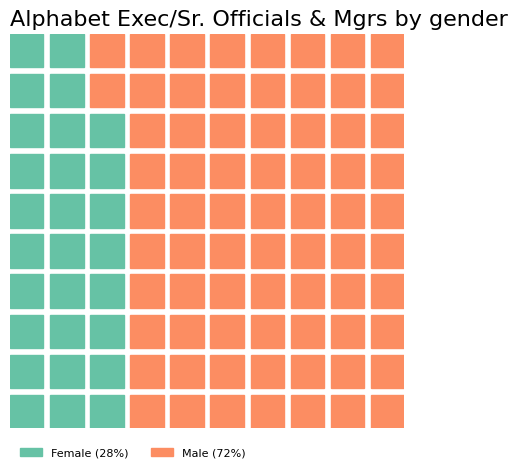

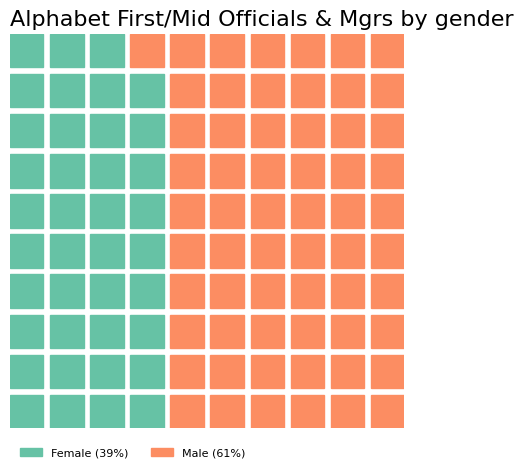

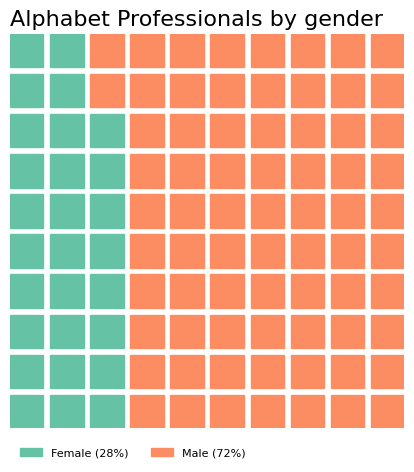

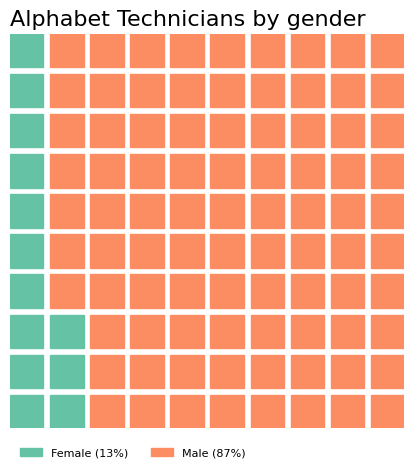

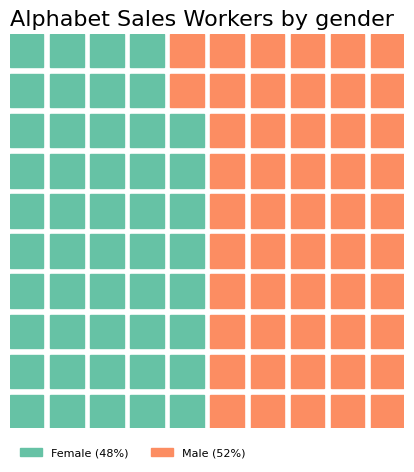

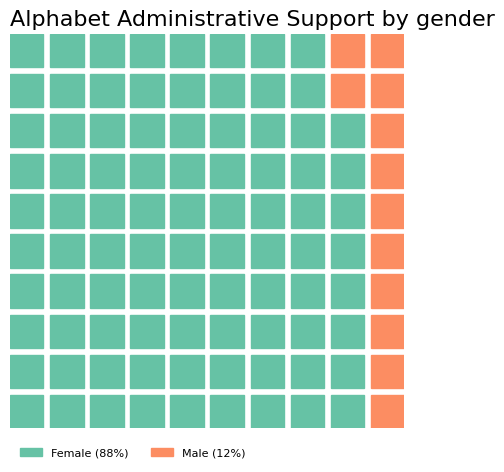

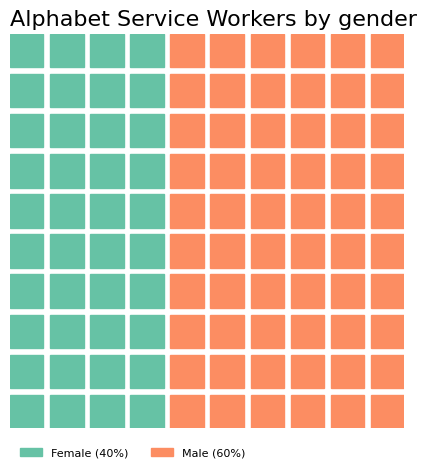

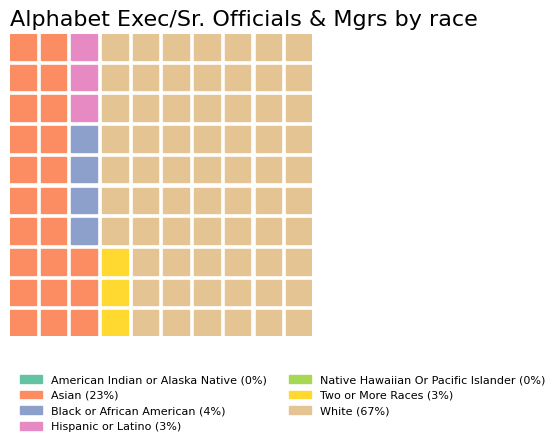

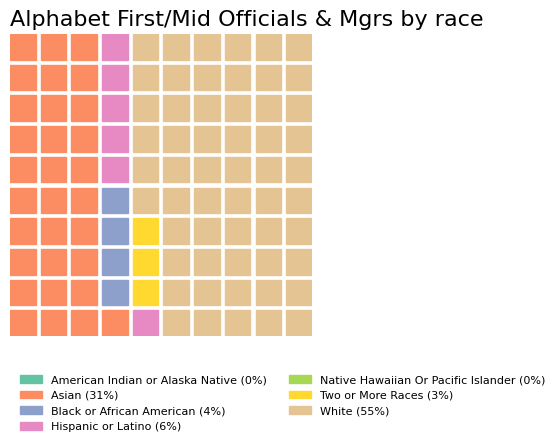

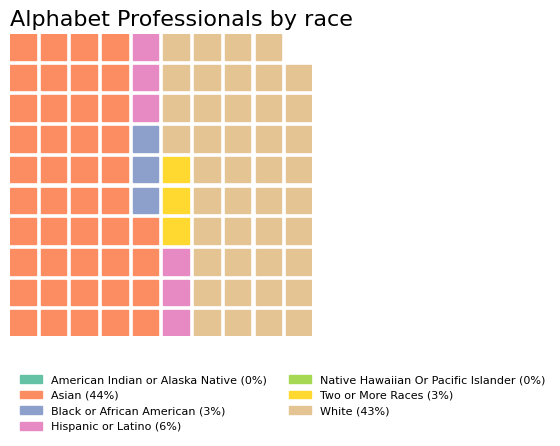

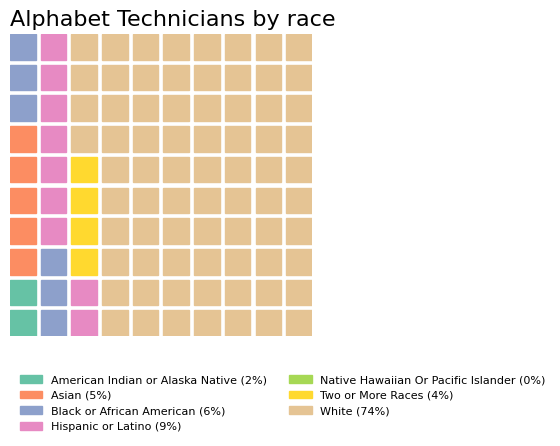

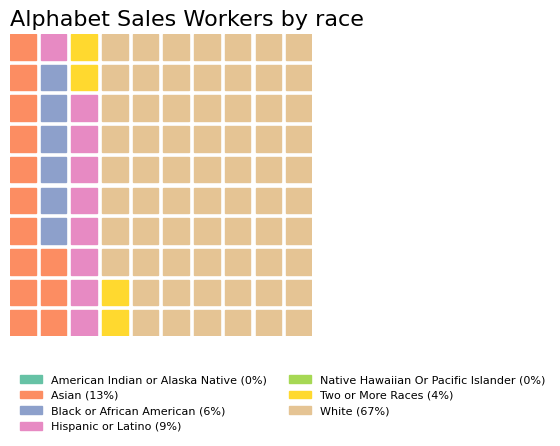

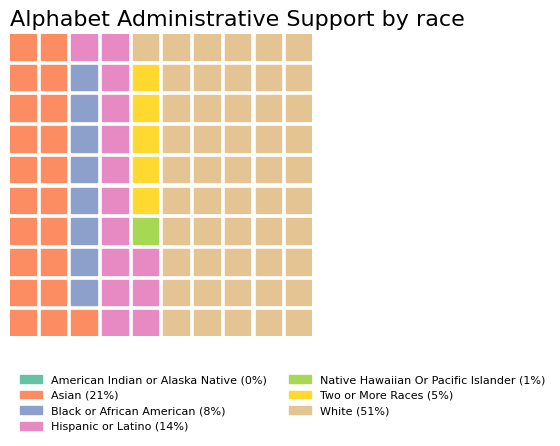

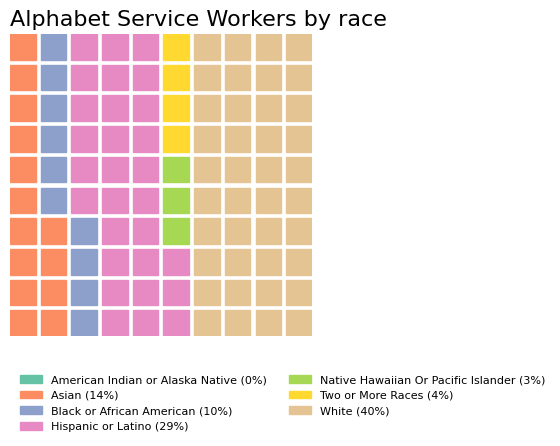

In [62]:
#later, generaliaze this for companies. it's just for alphabet for now. 
for key, dict in Alphabet_gender_race_dict.items():
    for file_name, val_dict in dict.items():
        print(val_dict)
        job = val_dict['job']
        data = val_dict['data']['count_employees']
        try: 
            fig = make_waffle_fig(data, job, file_name, "Alphabet", key)
        except ValueError:
            pass
        print(f"made waffle fig")

In [66]:

#this is currently gender only, but I should be able to customize it to do race as well. 
def make_waffle_fig(perc_data, job, file_name, company , sortBy1 = 'job_category', sortBy2 = 'gender', ):

    gender_fig = plt.figure(
        FigureClass=Waffle,
        rows = 10,
        columns = 10,
        values = perc_data,
        # labels=list(amz_tech_gender.index),
        # legend={'loc': 'upper left', 'bbox_to_anchor':(1,1)},
        title={'label': str(company) + " " + str(job)+ " by Gender",
        'loc': 'left',
        'fontdict': {
            'fontsize': 16
        }
        },
        labels = [f"{k[1]} (int({v})%)" for k, v in perc_data.items()],
        legend={
            'loc': 'lower left',
            'bbox_to_anchor': (0, -.10),
            'ncol': len(perc_data),
            'framealpha': 0,
            'fontsize': 8
        }
    )
    gender_fig.savefig(str(file_name) + ".png", bbox_inches="tight")

In [90]:
#manually copying to do it for race (for now, I'll try to make DRY later)
def make_race_waffle_fig(perc_data, job, file_name, company = "Amazon", sortBy1 = 'job_category', sortBy2 = 'race' ):

    race_fig = plt.figure(
        FigureClass=Waffle,
        rows = 10,
        columns = 10,
        values = perc_data,
        # labels=list(amz_tech_gender.index),
        # legend={'loc': 'upper left', 'bbox_to_anchor':(1,1)},
        title={'label': str(company) + " " + str(job)+ " by Race",
        'loc': 'left',
        'fontdict': {
            'fontsize': 16
        }
        },
        labels = [f"{k[1]} (int({v})%)" for k, v in perc_data.items()],
        legend={
            'loc': 'lower left',
            'bbox_to_anchor': (0, -.30),
            #'ncol': len(perc_data),
            'ncol': 2,
            'framealpha': 0,
            'fontsize': 8
        }
    )
    race_fig.savefig(str(file_name) + ".png", bbox_inches="tight")

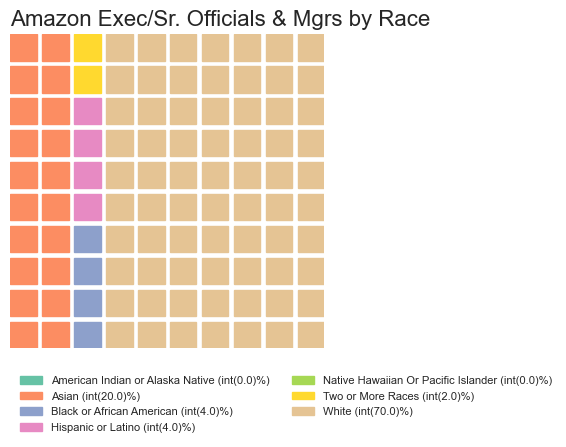

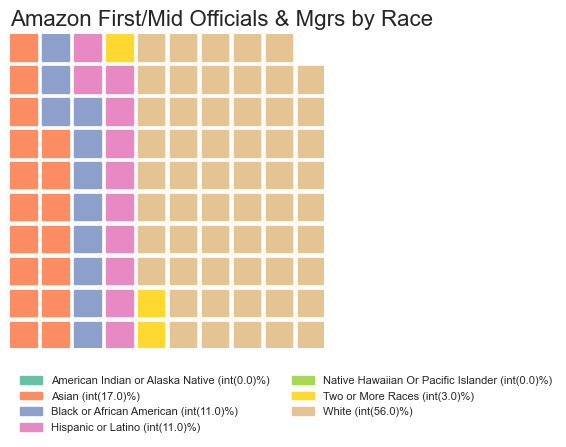

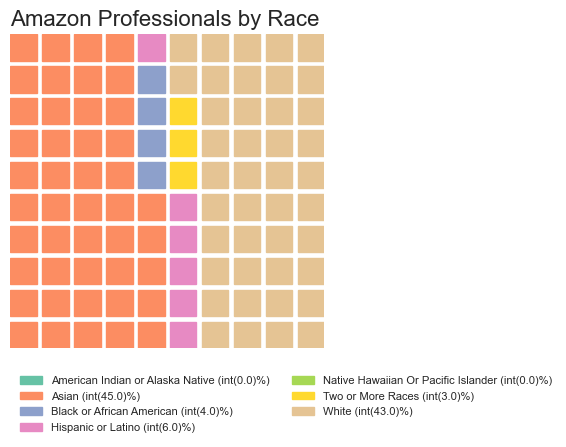

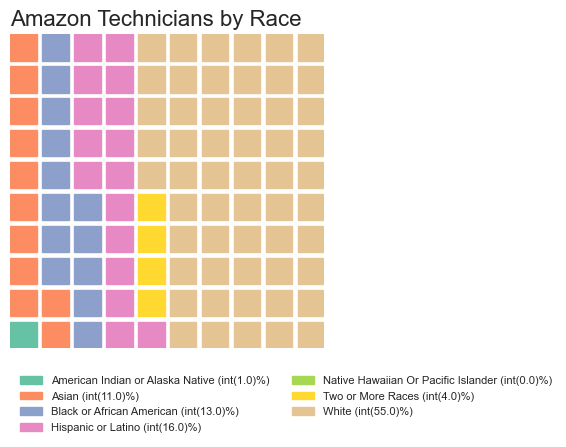

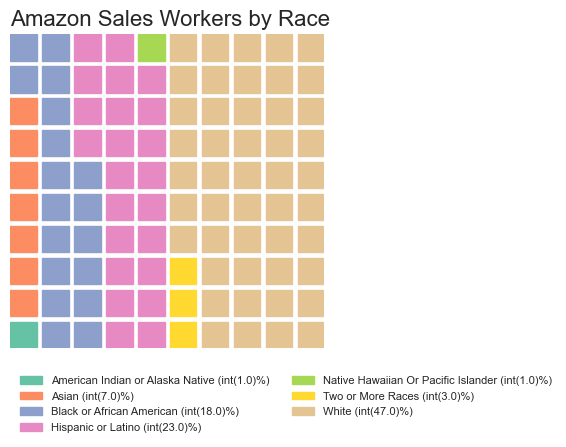

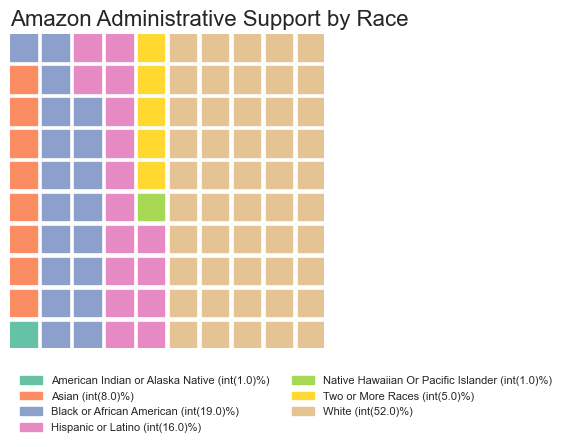

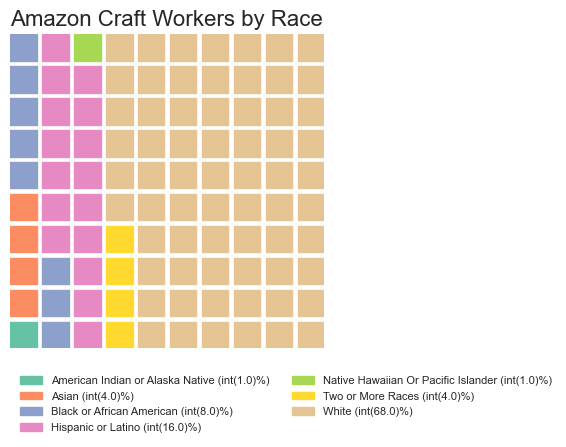

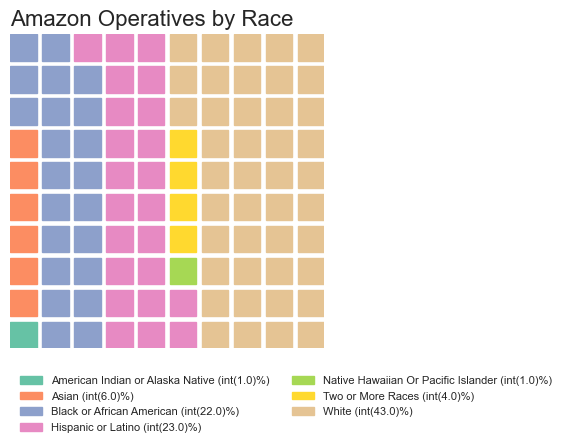

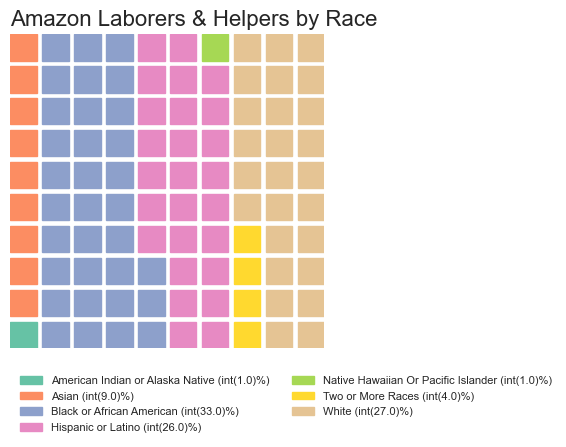

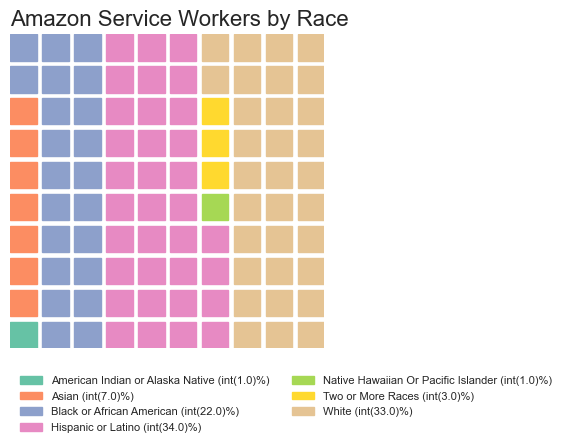

In [91]:
#doing for race:
for file_name, val_dict in amz_race_data.items():
    job = val_dict['job']
    data = val_dict['data']['count_employees']
    make_race_waffle_fig(data, job, file_name)
    #print(f"made waffle fig")

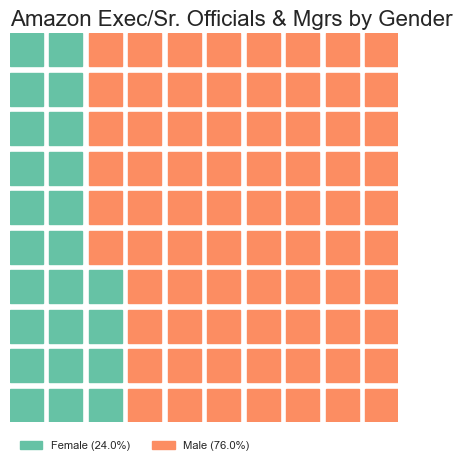

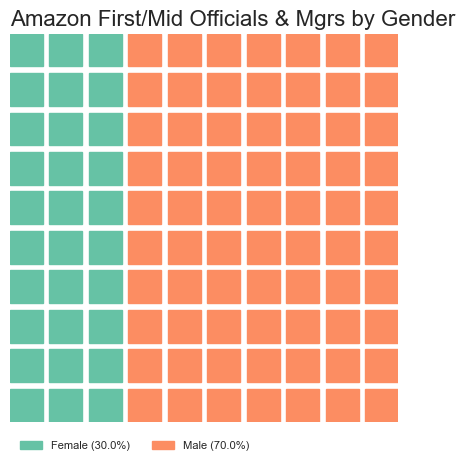

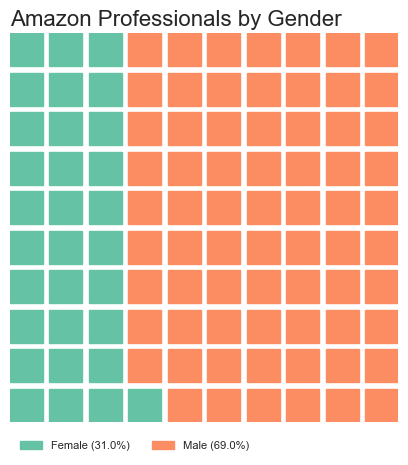

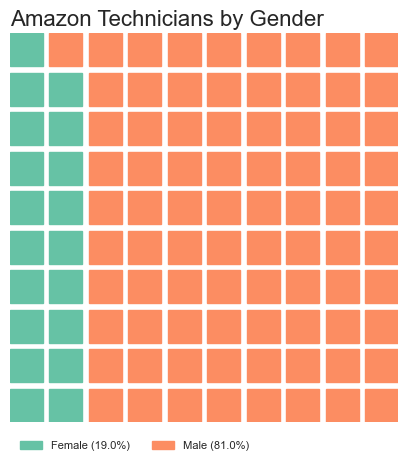

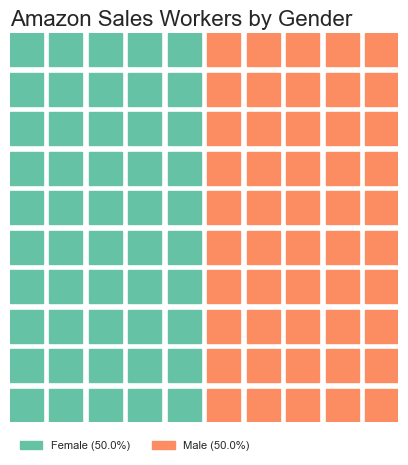

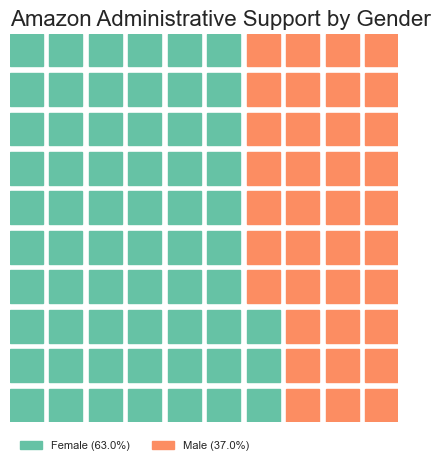

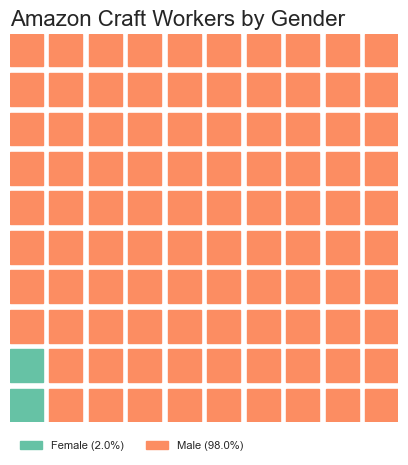

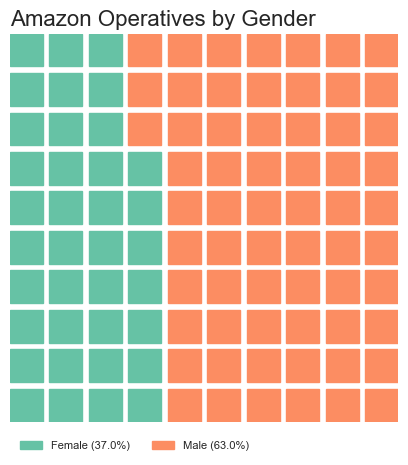

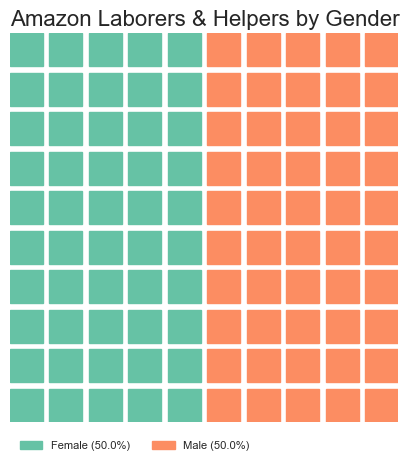

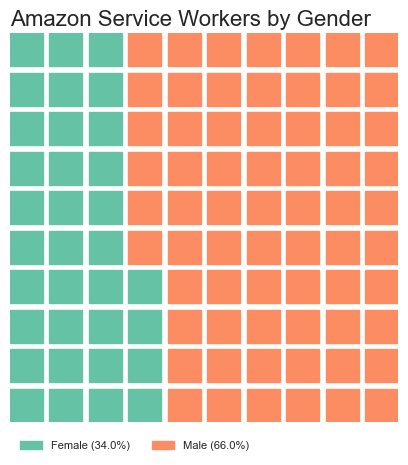

In [68]:
#amz_gender data has keys that are the file names (eg amz_exec_gender, amz_techn_gender)
#and values that are dictionaries.  each dictionary has file_name = file_name, data = the data., job = job.
for file_name, val_dict in amz_gender_data.items():
    job = val_dict['job']
    data = val_dict['data']['count_employees']
    make_waffle_fig(data, job, file_name)